<a href="https://colab.research.google.com/github/esair2515/hohs_aiclub/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
250/250 [==============================] - 10s 34ms/step - loss: 0.8000 - accuracy: 0.7090
Epoch 2/10
250/250 [==============================] - 5s 21ms/step - loss: 0.4921 - accuracy: 0.8161
Epoch 3/10
250/250 [==============================] - 5s 18ms/step - loss: 0.4322 - accuracy: 0.8465
Epoch 4/10
250/250 [==============================] - 6s 23ms/step - loss: 0.3844 - accuracy: 0.8644
Epoch 5/10
250/250 [==============================] - 5s 18ms/step - loss: 0.3531 - accuracy: 0.8729
Epoch 6/10
250/250 [==============================] - 4s 18ms/step - loss: 0.3218 - accuracy: 0.8808
Epoch 7/10
250/250 [==============================] - 6s 22ms/step - loss: 0.3027 - accuracy: 0.8911
Epoch 8/10
250/250 [==============================] - 4s 17ms/step - loss: 0.2775 - accuracy: 0.8985
Epoch 9/10
250/250 [==============================] - 5s 19ms/step - loss: 0.2646 - accuracy: 0.9062
Epoch 10/10
250/250 [==============================] - 1s 5ms/step
Prediction: Bag


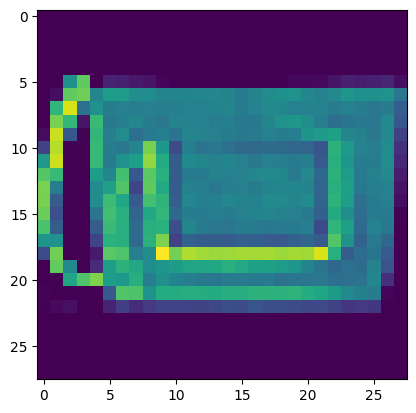

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

label_dictionary = {0:"T-shirt",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",
                    5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}




fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()


training_images = training_images / 255.0
test_images = test_images / 255.0

training_images = training_images[0:8000]
test_images = test_images[0:8000]

training_labels = training_labels[0:8000]
test_labels = test_labels[0:8000]

model = tf.keras.models.Sequential([


  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)


test = model.evaluate(test_images, test_labels)

predictions = model.predict(test_images)

index = 220

plt.imshow(test_images[index])

prediction = label_dictionary[np.argmax(predictions[index])]
print("Prediction: {}".format(prediction))


